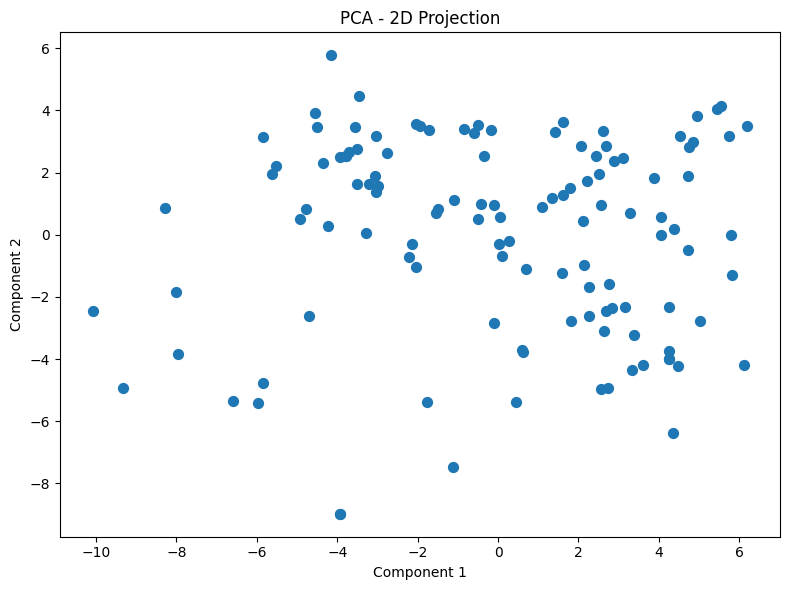

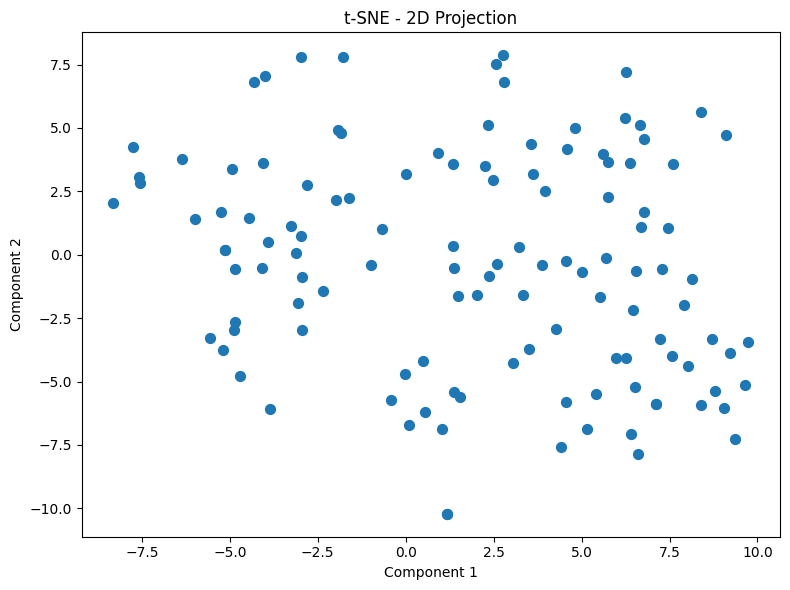

/Users/freshliannes.rosal/anaconda3/envs/Numerical/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


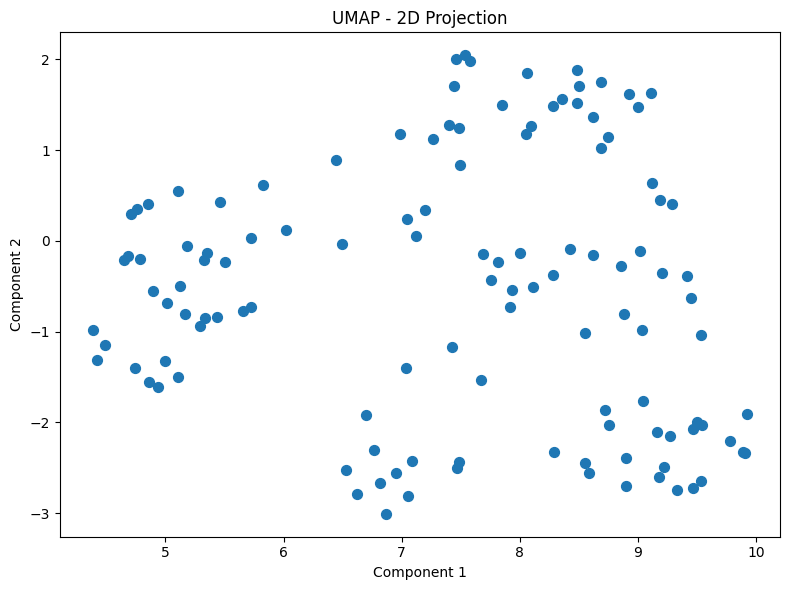

🧮 PCA Explained Variance:
  PC1: 17.01%, PC2: 11.46%, PC3: 8.73%


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Use UMAP if available
try:
    import umap
    UMAP_AVAILABLE = True
except ImportError:
    UMAP_AVAILABLE = False

# Load your Excel file
file_path = 'features.xlsx'  # Replace with your filename
df = pd.read_excel(file_path)

# Optional: separate label column if available
label_column = 'Group' if 'Group' in df.columns else None
if label_column:
    labels = df[label_column]
    df = df.drop(columns=[label_column])
else:
    labels = None

# Keep only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Handle missing values
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# === PCA ===
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# === Plot PCA Results ===
def plot_2d(data, title, labels=None):
    plt.figure(figsize=(8, 6))
    if labels is not None:
        sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='Set2', s=60)
    else:
        plt.scatter(data[:, 0], data[:, 1], s=50)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.tight_layout()
    plt.show()

plot_2d(pca_result, "PCA - 2D Projection", labels)

# === t-SNE ===
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)
plot_2d(tsne_result, "t-SNE - 2D Projection", labels)

# === UMAP ===
if UMAP_AVAILABLE:
    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_result = reducer.fit_transform(scaled_data)
    plot_2d(umap_result, "UMAP - 2D Projection", labels)
else:
    print("UMAP is not installed. Run: pip install umap-learn")

# === Explained Variance (PCA) ===
explained = pca.explained_variance_ratio_
print(f"🧮 PCA Explained Variance:\n  PC1: {explained[0]:.2%}, PC2: {explained[1]:.2%}, PC3: {explained[2]:.2%}")


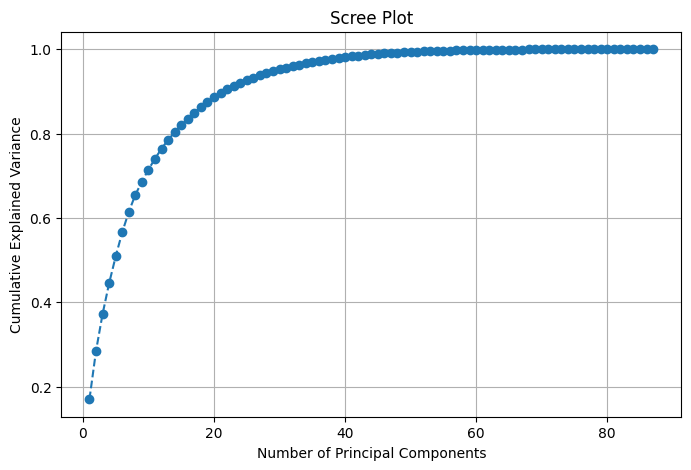


Top features contributing to PC1:
delta_std_1     0.234619
mfcc_std_1      0.233486
mfcc_std_2      0.208835
delta_std_3     0.197787
delta_std_2     0.196567
mfcc_mean_13    0.192354
mfcc_std_3      0.189628
rms_mean        0.184009
mfcc_std_6      0.181181
delta2_std_5    0.173687
Name: PC1, dtype: float64

Top features contributing to PC2:
mfcc_mean_12    0.222859
delta_std_11    0.219669
mfcc_std_11     0.214898
delta_std_13    0.212087
delta_std_8     0.210268
mfcc_mean_9     0.208348
mfcc_std_13     0.202761
mfcc_mean_11    0.189574
mfcc_mean_7     0.187299
mfcc_std_8      0.186723
Name: PC2, dtype: float64

Top features contributing to PC3:
mfcc_std_12               0.213432
spectral_rolloff_std      0.211673
zcr_mean                  0.204441
delta_mean_2              0.202736
delta_mean_7              0.188314
spectral_centroid_mean    0.175664
mfcc_mean_2               0.175203
delta_mean_9              0.174779
delta_mean_1              0.169464
delta_mean_8              0.

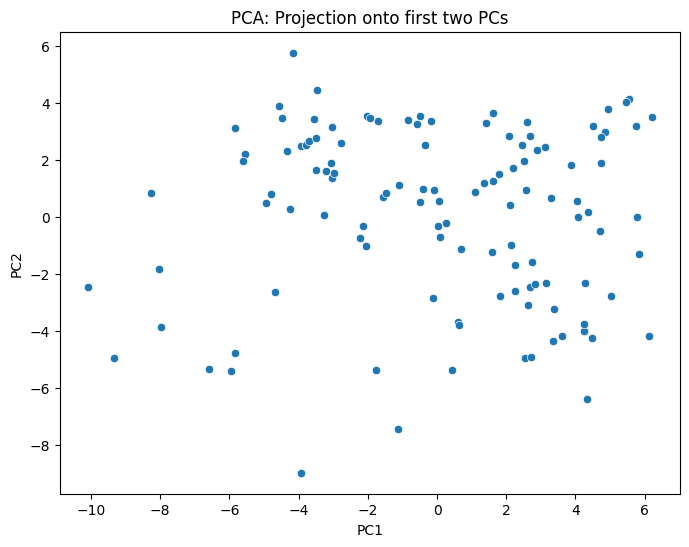

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load your data from Excel
file_path = 'features.xlsx'  # <-- Change this to your actual file path
df = pd.read_excel(file_path)

# Optional: If you have non-numeric columns (like labels), separate them
# For example, if 'Group' is a label column:
# labels = df['Group']
# data = df.drop(columns=['Group'])
# If all columns are numeric features, just:
data = df.select_dtypes(include='number')

# 2. Standardize data (important before PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 3. Fit PCA
pca = PCA()
pca.fit(data_scaled)

explained_variance = pca.explained_variance_ratio_

# 4. Scree Plot (cumulative explained variance)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# 5. PCA Loadings: top 10 features contributing to first 3 PCs
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(explained_variance))],
                        index=data.columns)

for i in range(3):
    print(f"\nTop features contributing to PC{i+1}:")
    print(loadings[f'PC{i+1}'].abs().sort_values(ascending=False).head(10))

# 6. Project data onto first two PCs for visualization
pca_data = pca.transform(data_scaled)
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# If you have labels, add them here for colored plotting
# pca_df['Group'] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)  # add 'hue="Group"' inside if labels exist
plt.title('PCA: Projection onto first two PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


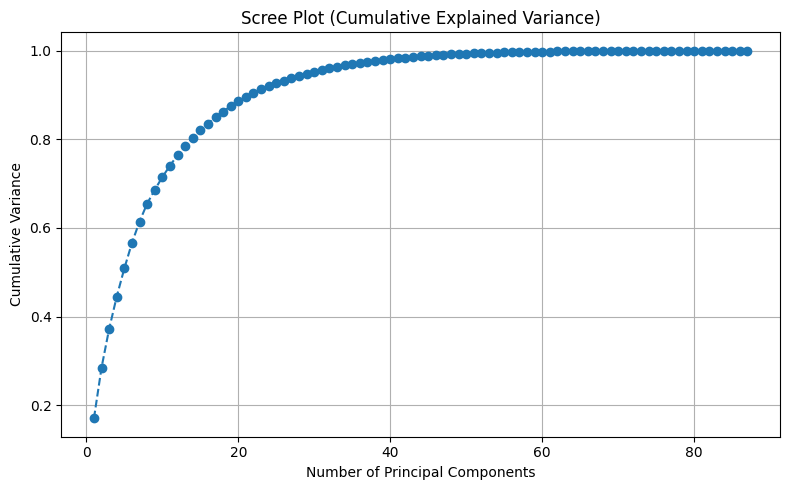


🔷 PCA reduced dimensions to 30 components (95% variance)

🔷 SelectKBest selected top 20 features:
['mfcc_mean_1', 'mfcc_mean_2', 'mfcc_mean_4', 'mfcc_mean_5', 'mfcc_mean_7', 'mfcc_mean_8', 'mfcc_mean_11', 'mfcc_std_11', 'mfcc_std_12', 'mfcc_std_13', 'delta_std_4', 'delta_std_11', 'delta_std_13', 'delta2_std_2', 'delta2_std_11', 'spectral_centroid_mean', 'spectral_bandwidth_mean', 'spectral_rolloff_mean', 'rms_mean', 'rms_std']

🔷 Random Forest top 20 important features:
['mfcc_mean_4', 'mfcc_mean_5', 'rms_std', 'rms_mean', 'mfcc_mean_2', 'mfcc_mean_8', 'delta2_std_2', 'mfcc_std_13', 'delta_std_13', 'spectral_centroid_mean', 'mfcc_mean_1', 'zcr_mean', 'mfcc_std_11', 'spectral_centroid_std', 'spectral_rolloff_std', 'delta2_std_13', 'mfcc_mean_3', 'mfcc_mean_6', 'mfcc_std_12', 'mfcc_mean_7']

✅ You now have three reduced datasets ready for ML training:
- `pca_df` → PCA-based reduced data
- `kbest_df` → SelectKBest reduced data
- `rf_df` → Random Forest feature-selected data

🎯 Test Accur

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# --- Step 1: Load and preprocess data ---
file_path = 'features.xlsx'  # 🔁 Change to your file name
df = pd.read_excel(file_path)

# Replace 'YourTargetColumn' with your actual target column name
target_column = 'Label'
y = df[target_column]
X = df.drop(columns=[target_column])

# Keep only numeric columns for feature reduction
X = X.select_dtypes(include='number')

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 2: PCA ---
pca = PCA()
pca.fit(X_scaled)
explained_var = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var.cumsum(), marker='o', linestyle='--')
plt.title('Scree Plot (Cumulative Explained Variance)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

# PCA with 95% variance retained
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df[target_column] = y

print(f"\n🔷 PCA reduced dimensions to {X_pca.shape[1]} components (95% variance)")

# --- Step 3: Feature Selection - SelectKBest ---
kbest = SelectKBest(score_func=f_classif, k=20)
X_kbest = kbest.fit_transform(X, y)
selected_features_kbest = X.columns[kbest.get_support()]
kbest_df = pd.DataFrame(X_kbest, columns=selected_features_kbest)
kbest_df[target_column] = y

print(f"\n🔷 SelectKBest selected top 20 features:\n{selected_features_kbest.tolist()}")

# --- Step 4: Feature Selection - Random Forest Importance ---
forest = RandomForestClassifier(random_state=42)
forest.fit(X, y)
importances = pd.Series(forest.feature_importances_, index=X.columns)
top_rf_features = importances.sort_values(ascending=False).head(20)
rf_df = df[top_rf_features.index.tolist() + [target_column]]

print(f"\n🔷 Random Forest top 20 important features:\n{top_rf_features.index.tolist()}")

# --- Step 5: Output all datasets ---
print("\n✅ You now have three reduced datasets ready for ML training:")
print("- `pca_df` → PCA-based reduced data")
print("- `kbest_df` → SelectKBest reduced data")
print("- `rf_df` → Random Forest feature-selected data")

# Optional: quick model training test on one (PCA)
X_train, X_test, y_train, y_test = train_test_split(pca_df.drop(columns=target_column), pca_df[target_column], test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f"\n🎯 Test Accuracy using PCA dataset: {model.score(X_test, y_test):.4f}")
# Save reduced datasets to CSV
pca_df.to_csv('reduced_pca_dataset.csv', index=False)
kbest_df.to_csv('reduced_kbest_dataset.csv', index=False)
rf_df.to_csv('reduced_rf_dataset.csv', index=False)

print("\n📁 Reduced datasets saved as:")
print("  - reduced_pca_dataset.csv")
print("  - reduced_kbest_dataset.csv")
print("  - reduced_rf_dataset.csv")




🔍 Evaluating: Logistic Regression
✅ Accuracy: 0.9167
✅ ROC AUC: 0.9861
              precision    recall  f1-score   support

        Ripe       0.92      0.92      0.92        12
      Unripe       0.92      0.92      0.92        12

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



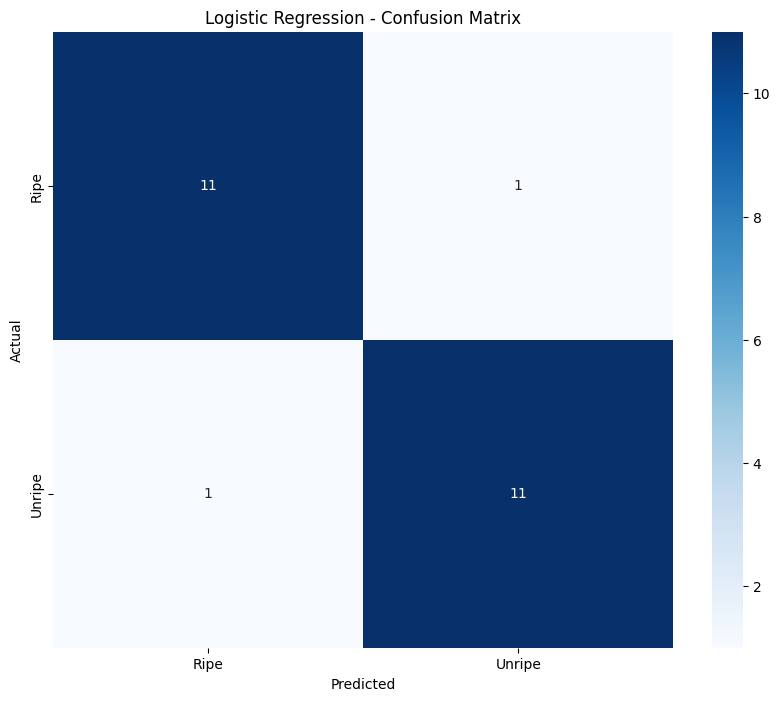


🔍 Evaluating: Random Forest
✅ Accuracy: 0.8333
✅ ROC AUC: 0.9653
              precision    recall  f1-score   support

        Ripe       0.90      0.75      0.82        12
      Unripe       0.79      0.92      0.85        12

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24



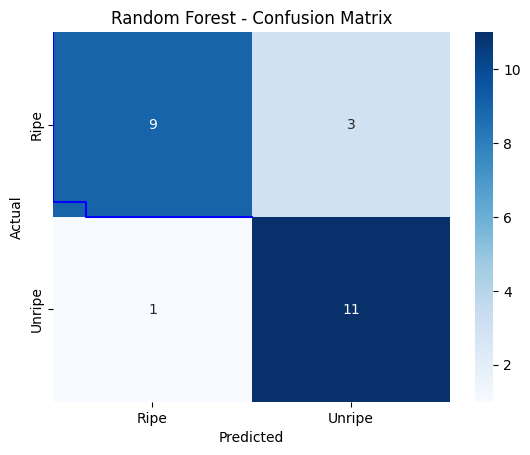


🔍 Evaluating: SVM
✅ Accuracy: 0.9167
✅ ROC AUC: 0.9861
              precision    recall  f1-score   support

        Ripe       0.92      0.92      0.92        12
      Unripe       0.92      0.92      0.92        12

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



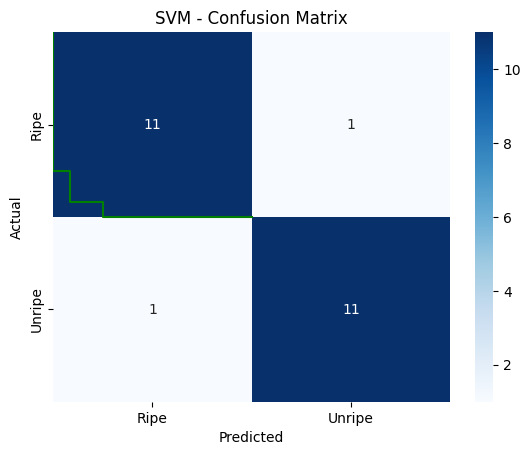


🔍 Evaluating: XGBoost
✅ Accuracy: 0.7917
✅ ROC AUC: 0.9236
              precision    recall  f1-score   support

        Ripe       0.89      0.67      0.76        12
      Unripe       0.73      0.92      0.81        12

    accuracy                           0.79        24
   macro avg       0.81      0.79      0.79        24
weighted avg       0.81      0.79      0.79        24



/Users/freshliannes.rosal/anaconda3/envs/Numerical/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:32:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


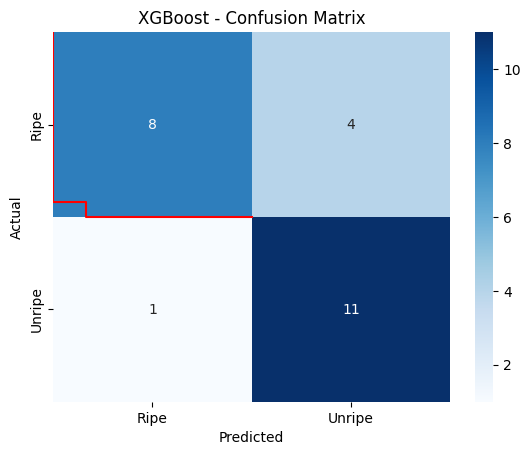


🔍 Evaluating: KNN
✅ Accuracy: 0.9167
✅ ROC AUC: 0.9444
              precision    recall  f1-score   support

        Ripe       0.86      1.00      0.92        12
      Unripe       1.00      0.83      0.91        12

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24



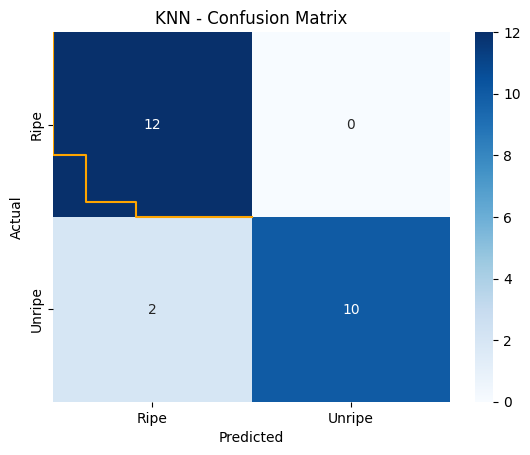


🔍 Evaluating: MLP
✅ Accuracy: 0.9583
✅ ROC AUC: 0.9792
              precision    recall  f1-score   support

        Ripe       0.92      1.00      0.96        12
      Unripe       1.00      0.92      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



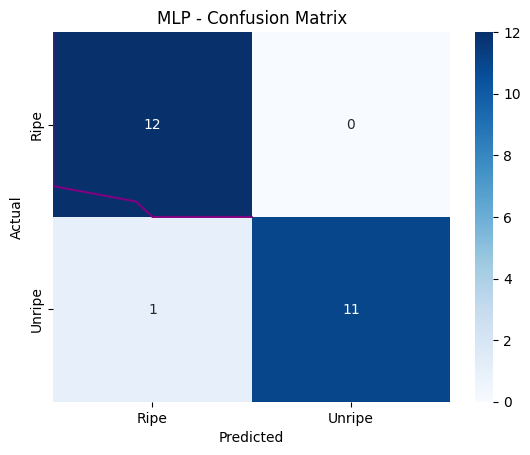

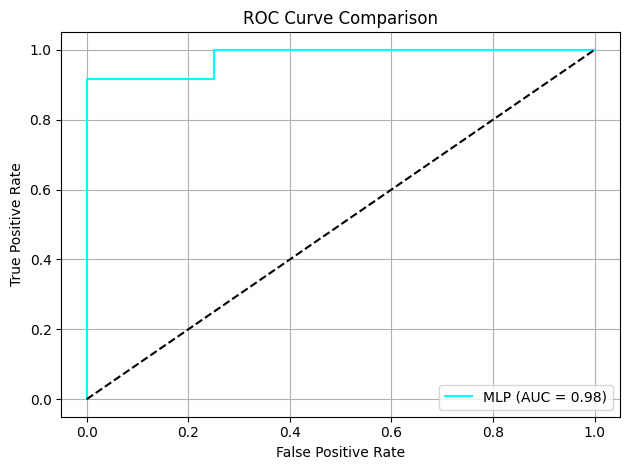


🔁 5-Fold Cross-Validation Accuracies:
Logistic Regression: Mean = 0.9083, Std = 0.0612
Random Forest: Mean = 0.8667, Std = 0.0612
SVM: Mean = 0.9333, Std = 0.0726
XGBoost: Mean = 0.8417, Std = 0.0486
KNN: Mean = 0.8917, Std = 0.0425


/Users/freshliannes.rosal/anaconda3/envs/Numerical/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:32:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/freshliannes.rosal/anaconda3/envs/Numerical/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:32:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/freshliannes.rosal/anaconda3/envs/Numerical/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:32:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/freshliannes.rosal/anaconda3/envs/Numerical/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:32:17] WARN

MLP: Mean = 0.8833, Std = 0.0717


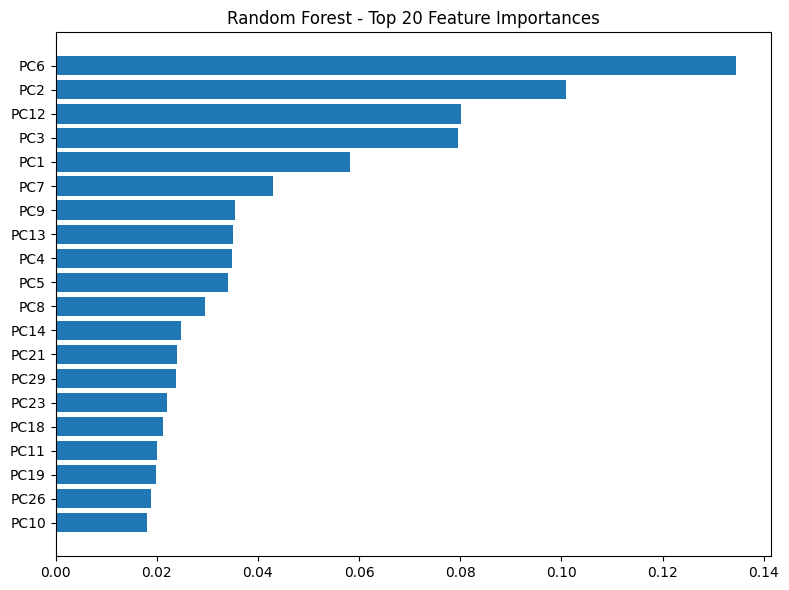

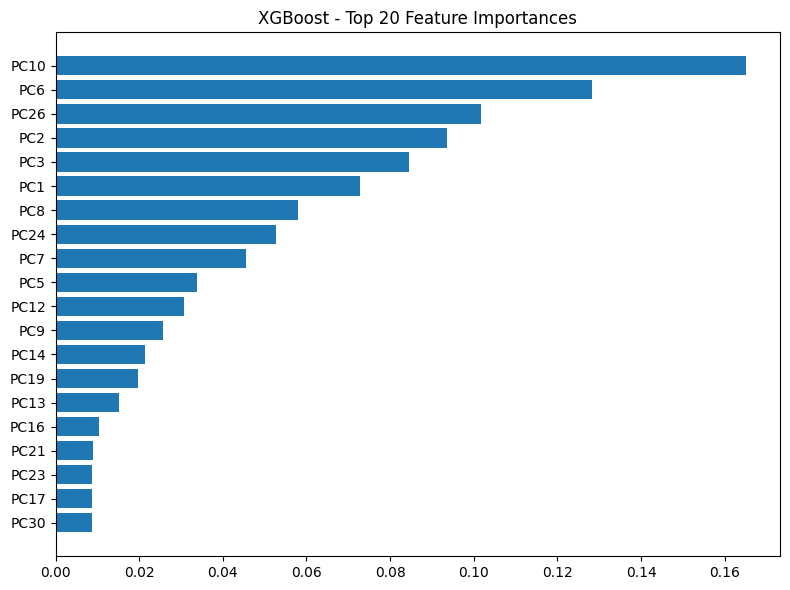


📊 Model Accuracy Summary:
Logistic Regression: Accuracy = 0.9167, ROC AUC = 0.9861
Random Forest: Accuracy = 0.8333, ROC AUC = 0.9653
SVM: Accuracy = 0.9167, ROC AUC = 0.9861
XGBoost: Accuracy = 0.7917, ROC AUC = 0.9236
KNN: Accuracy = 0.9167, ROC AUC = 0.9444
MLP: Accuracy = 0.9583, ROC AUC = 0.9792


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve
)

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Load reduced dataset
df = pd.read_csv('reduced_pca_dataset.csv')  # 🔁 Or 'reduced_kbest_dataset.csv' or 'reduced_rf_dataset.csv'

# Set target column name
target_column = 'Label'  # 🔁 Change this to your actual label column
X = df.drop(columns=[target_column])
y = df[target_column]

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=500)
}

# Prepare plotting
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan']

# Evaluation container
results = {}

for i, (name, model) in enumerate(models.items()):
    print(f"\n🔍 Evaluating: {name}")
    
    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Scores
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results[name] = {'Accuracy': acc, 'ROC AUC': auc}
    
    # Report
    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ ROC AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})", color=colors[i])

# Finalize ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cross-validation summary
print("\n🔁 5-Fold Cross-Validation Accuracies:")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    print(f"{name}: Mean = {scores.mean():.4f}, Std = {scores.std():.4f}")

# Feature importance (Random Forest and XGBoost)
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[-20:]
        plt.figure(figsize=(8, 6))
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
        plt.title(f"{name} - Top 20 Feature Importances")
        plt.tight_layout()
        plt.show()

# Print accuracy summary
print("\n📊 Model Accuracy Summary:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}, ROC AUC = {metrics['ROC AUC']:.4f}")


/var/folders/j3/kwprsg3s3_zf9_90gxwcknm00000gn/T/ipykernel_76343/550254406.py:42: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
1/1 [==============================] - 0s 36ms/step

Best Accuracy: 0.9479 using {'ann__batch_size': 16, 'ann__dropout_rate': 0.0, 'ann__epochs': 50, 'ann__neurons': 64, 'ann__optimizer': 'rmsprop'}

All tested parameters with mean and std accuracy:
{'ann__batch_size': 16, 'ann__dropout_rate': 0.0, 'ann__epochs': 50, 'ann__neurons': 32, 'ann__optimizer': 'adam'} => Mean accuracy: 0.7084 (+/- 0.0971)
{'ann__batch_size': 16, 'ann__dropout_rate': 0.0, 'ann__epochs': 50, 'ann__neurons': 32, 'ann__optimizer': 'rmsprop'} => Mean accuracy: 0.8532 (+/- 0.0848)
{'ann__batch_size': 16, 'ann__dropout_rate': 0.0, 'ann__epochs': 50, 'ann__neurons': 64, 'ann__optimizer': 'adam'} => Mean accuracy: 0.8532 (+/- 0.0911)
{'ann__batch_size': 16, 'ann__dropout_rate': 0.0, 'ann__epochs': 50, 'ann__neurons': 64, 'ann__optimizer': 'rmsprop'} => Mean accuracy: 0.9479 (+/- 0.0577)
{'ann__batch_size': 16, 'ann__dropout_rate': 0.0, 'ann__epochs': 100, 

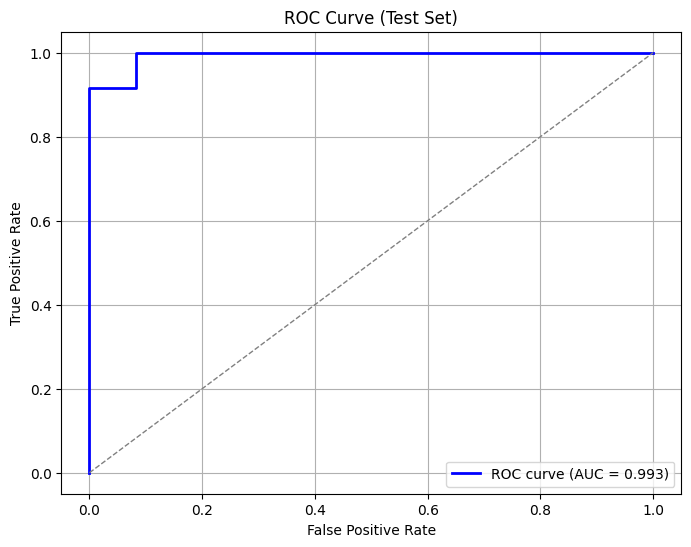


Running manual CV with classification reports per fold...

1/1 [==============================] - 0s 25ms/step
Fold 1 accuracy: 0.9000
Classification report (Fold 1):
              precision    recall  f1-score   support

        Ripe       0.83      1.00      0.91        10
      Unripe       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



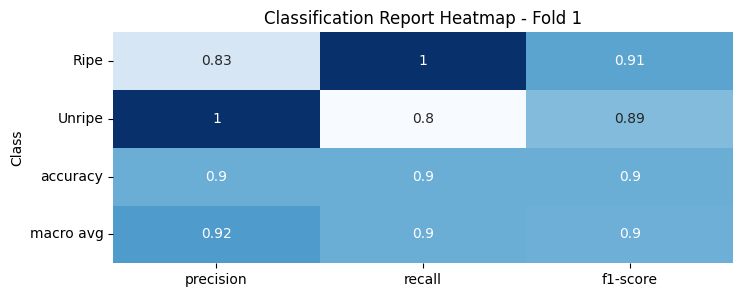

1/1 [==============================] - 0s 22ms/step
Fold 2 accuracy: 0.8947
Classification report (Fold 2):
              precision    recall  f1-score   support

        Ripe       0.82      1.00      0.90         9
      Unripe       1.00      0.80      0.89        10

    accuracy                           0.89        19
   macro avg       0.91      0.90      0.89        19
weighted avg       0.91      0.89      0.89        19



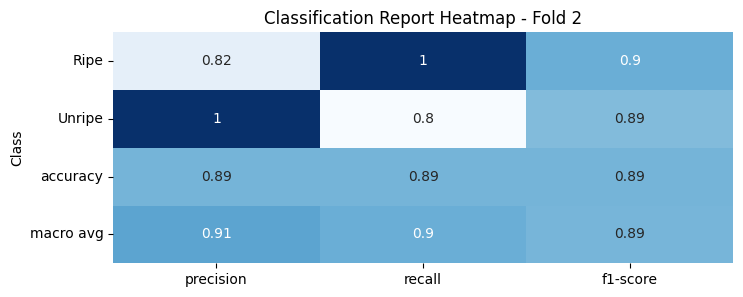

1/1 [==============================] - 0s 20ms/step
Fold 3 accuracy: 0.8421
Classification report (Fold 3):
              precision    recall  f1-score   support

        Ripe       0.80      0.89      0.84         9
      Unripe       0.89      0.80      0.84        10

    accuracy                           0.84        19
   macro avg       0.84      0.84      0.84        19
weighted avg       0.85      0.84      0.84        19



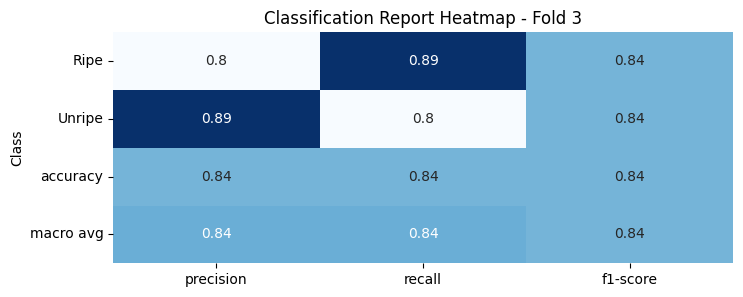

1/1 [==============================] - 0s 19ms/step
Fold 4 accuracy: 0.8947
Classification report (Fold 4):
              precision    recall  f1-score   support

        Ripe       0.90      0.90      0.90        10
      Unripe       0.89      0.89      0.89         9

    accuracy                           0.89        19
   macro avg       0.89      0.89      0.89        19
weighted avg       0.89      0.89      0.89        19



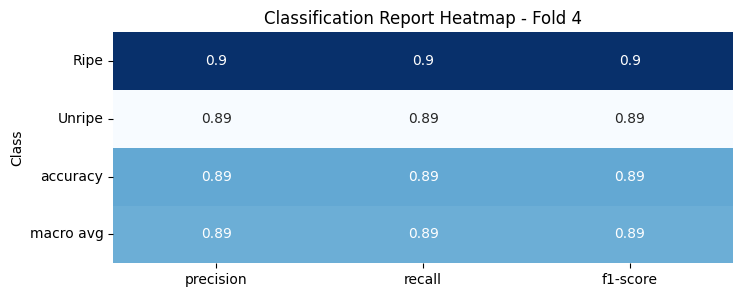

1/1 [==============================] - 0s 19ms/step
Fold 5 accuracy: 0.9474
Classification report (Fold 5):
              precision    recall  f1-score   support

        Ripe       1.00      0.90      0.95        10
      Unripe       0.90      1.00      0.95         9

    accuracy                           0.95        19
   macro avg       0.95      0.95      0.95        19
weighted avg       0.95      0.95      0.95        19



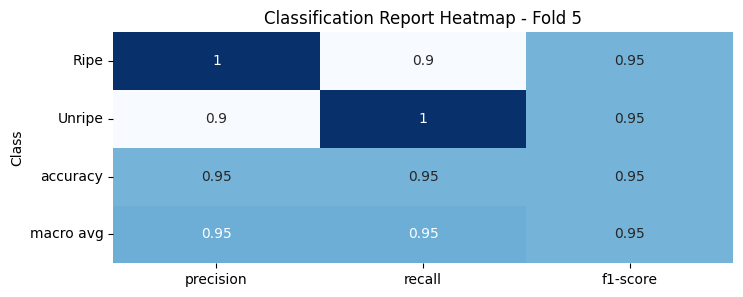

Mean CV Accuracy: 0.8958 +/- 0.0334


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Load dataset (update path as needed)
df = pd.read_csv('reduced_pca_dataset.csv')

# Assume last column is target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode target labels if categorical
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split dataset into train/test for final evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

def create_model(optimizer='adam', dropout_rate=0.0, neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap Keras model for scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ann', model)
])

param_grid = {
    'ann__epochs': [50, 100],
    'ann__batch_size': [16, 32],
    'ann__optimizer': ['adam', 'rmsprop'],
    'ann__dropout_rate': [0.0, 0.2],
    'ann__neurons': [32, 64]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with cross-validation
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kfold, scoring='accuracy', verbose=1)
grid_result = grid.fit(X_train, y_train)

print(f"\nBest Accuracy: {grid_result.best_score_:.4f} using {grid_result.best_params_}")

# Extract cross-validation results
cv_results = grid_result.cv_results_
mean_scores = cv_results['mean_test_score']
std_scores = cv_results['std_test_score']
params = cv_results['params']

print("\nAll tested parameters with mean and std accuracy:")
for mean, std, param in zip(mean_scores, std_scores, params):
    print(f"{param} => Mean accuracy: {mean:.4f} (+/- {std:.4f})")

# Evaluate best model on test set
best_model = grid_result.best_estimator_

y_pred_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion matrix and classification report on test set
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Test Set):")
print(cm)

cr = classification_report(y_test, y_pred, target_names=le.classes_)
print("\nClassification Report (Test Set):")
print(cr)

# ROC curve on test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# === MANUAL CROSS-VALIDATION WITH CLASSIFICATION REPORTS PER FOLD ===

print("\nRunning manual CV with classification reports per fold...\n")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_idx = 1
accuracies = []

for train_idx, val_idx in cv.split(X_train, y_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    # Create and train model with best params
    best_params = grid_result.best_params_
    model_cv = create_model(
        optimizer=best_params['ann__optimizer'],
        dropout_rate=best_params['ann__dropout_rate'],
        neurons=best_params['ann__neurons']
    )
    # Scale data
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_val_scaled = scaler.transform(X_val)

    history = model_cv.fit(
        X_tr_scaled, y_tr,
        epochs=best_params['ann__epochs'],
        batch_size=best_params['ann__batch_size'],
        verbose=0
    )

    y_val_prob = model_cv.predict(X_val_scaled).ravel()
    y_val_pred = (y_val_prob >= 0.5).astype(int)

    acc = accuracy_score(y_val, y_val_pred)
    accuracies.append(acc)

    print(f"Fold {fold_idx} accuracy: {acc:.4f}")

    # Classification report
    cr_val = classification_report(y_val, y_val_pred, target_names=le.classes_, output_dict=True)
    print(f"Classification report (Fold {fold_idx}):")
    print(classification_report(y_val, y_val_pred, target_names=le.classes_))

    # Visualize classification report as heatmap
    df_cr = pd.DataFrame(cr_val).iloc[:-1, :-1].T  # Remove accuracy row and support col for better heatmap
    plt.figure(figsize=(8, 3))
    sns.heatmap(df_cr, annot=True, cmap='Blues', cbar=False)
    plt.title(f'Classification Report Heatmap - Fold {fold_idx}')
    plt.ylabel('Class')
    plt.show()

    fold_idx += 1

print(f"Mean CV Accuracy: {np.mean(accuracies):.4f} +/- {np.std(accuracies):.4f}")


/var/folders/j3/kwprsg3s3_zf9_90gxwcknm00000gn/T/ipykernel_76343/1123237602.py:33: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)
2025-06-04 17:34:20.175235: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-06-04 17:34:20.181720: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-06-04 17:34:20.183263: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-06-04 17:34:20.185090: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-06-04 17:34:20.191725: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-06-04 17:34:20.191770: W tensorflow/tsl/platform/profile_ut

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 19ms/step

Best Accuracy from GridSearchCV: 0.9295 using {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 30, 'optimizer': 'rmsprop'}
GridSearchCV CV mean accuracy for best params: 0.9295
GridSearchCV CV std accuracy for best params: 0.1165

Manual Stratified K-Fold Cross Validation:


/var/folders/j3/kwprsg3s3_zf9_90gxwcknm00000gn/T/ipykernel_76343/1123237602.py:66: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  manual_model = KerasClassifier(build_fn=create_model, **best_params, verbose=0)


1/1 [==============================] - 0s 21ms/step
Fold 1 Accuracy: 0.9500
1/1 [==============================] - 0s 20ms/step
Fold 2 Accuracy: 0.9474
1/1 [==============================] - 0s 20ms/step
Fold 3 Accuracy: 0.8947
1/1 [==============================] - 0s 20ms/step
Fold 4 Accuracy: 0.8947
1/1 [==============================] - 0s 20ms/step
Fold 5 Accuracy: 0.8421

Manual Cross-Validation Mean Accuracy: 0.9058
Manual Cross-Validation Std Accuracy: 0.0400


/var/folders/j3/kwprsg3s3_zf9_90gxwcknm00000gn/T/ipykernel_76343/1123237602.py:85: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  final_model = KerasClassifier(build_fn=create_model, **best_params, verbose=0)


1/1 [==============================] - 0s 19ms/step

Classification Report on Test Data:
              precision    recall  f1-score   support

        Ripe       0.92      0.92      0.92        12
      Unripe       0.92      0.92      0.92        12

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



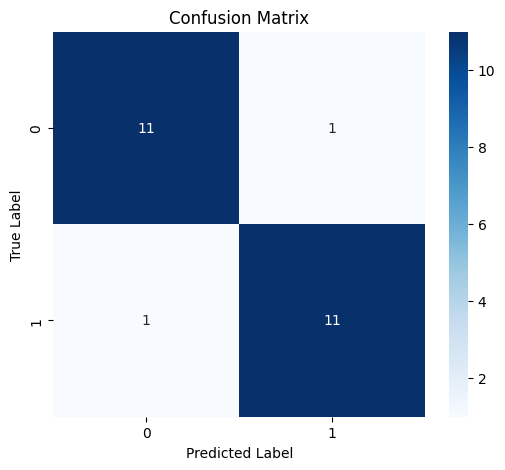

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Load your data (replace with your actual file)
df = pd.read_csv('reduced_pca_dataset.csv')  # or pd.read_excel for xlsx

X = df.drop('Label', axis=1).values  # replace 'target_column' with your target variable column name
y = df['Label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define model creation function for KerasClassifier
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap Keras model for use in scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

# Hyperparameter grid for tuning
param_grid = {
    'batch_size': [16, 32],
    'epochs': [30, 50],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.0, 0.2]
}

# GridSearchCV with stratified 5-fold CV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit GridSearch to training data
grid_result = grid.fit(X_train, y_train)

# Extract cv_results_ for mean/std printing
cv_results = grid_result.cv_results_

print(f"\nBest Accuracy from GridSearchCV: {grid_result.best_score_:.4f} using {grid_result.best_params_}")

best_index = grid_result.best_index_
mean_cv_score = cv_results['mean_test_score'][best_index]
std_cv_score = cv_results['std_test_score'][best_index]

print(f"GridSearchCV CV mean accuracy for best params: {mean_cv_score:.4f}")
print(f"GridSearchCV CV std accuracy for best params: {std_cv_score:.4f}")

# Manual cross-validation to confirm results
print("\nManual Stratified K-Fold Cross Validation:")

best_params = grid_result.best_params_
manual_model = KerasClassifier(build_fn=create_model, **best_params, verbose=0)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), 1):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    manual_model.fit(X_tr, y_tr)
    preds = manual_model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    accuracies.append(acc)
    print(f"Fold {fold} Accuracy: {acc:.4f}")

print(f"\nManual Cross-Validation Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Manual Cross-Validation Std Accuracy: {np.std(accuracies):.4f}")

# Train final model on all training data with best params
final_model = KerasClassifier(build_fn=create_model, **best_params, verbose=0)
final_model.fit(X_train, y_train)

# Predict on test set
y_pred = final_model.predict(X_test)

# Classification report and confusion matrix
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [13]:
import pandas as pd
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Load dataset
df = pd.read_csv('reduced_pca_dataset.csv')

label_col = 'Label'
class1 = 'Ripe'
class2 = 'Unripe'

data_class1 = df[df[label_col] == class1]
data_class2 = df[df[label_col] == class2]

features = [col for col in df.columns if col != label_col]

significant_features = []
not_significant_features = []

print(f"Statistical comparison of features between '{class1}' and '{class2}' groups:\n")

for feature in features:
    group1 = data_class1[feature].dropna()
    group2 = data_class2[feature].dropna()
    
    stat1, p1 = shapiro(group1)
    stat2, p2 = shapiro(group2)
    
    normal1 = p1 > 0.05
    normal2 = p2 > 0.05
    
    if normal1 and normal2:
        stat, p = ttest_ind(group1, group2, equal_var=False)
        test_name = "Welch's t-test"
    else:
        stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
        test_name = "Mann-Whitney U test"
    
    signif = p < 0.05
    
    if signif:
        significant_features.append(feature)
    else:
        not_significant_features.append(feature)

# Print summary
print("Significant features (p < 0.05):")
for feat in significant_features:
    print(f"  - {feat}")
print("\nNot significant features:")
for feat in not_significant_features:
    print(f"  - {feat}")

# Save dataset with only significant features + label
signif_df = df[significant_features + [label_col]]
signif_df.to_csv('significant_features_dataset.csv', index=False)
print(f"\nSaved dataset with significant features to 'significant_features_dataset.csv'")


Statistical comparison of features between 'Ripe' and 'Unripe' groups:

Significant features (p < 0.05):
  - PC1
  - PC2
  - PC3
  - PC5
  - PC6
  - PC7
  - PC9
  - PC12
  - PC13

Not significant features:
  - PC4
  - PC8
  - PC10
  - PC11
  - PC14
  - PC15
  - PC16
  - PC17
  - PC18
  - PC19
  - PC20
  - PC21
  - PC22
  - PC23
  - PC24
  - PC25
  - PC26
  - PC27
  - PC28
  - PC29
  - PC30

Saved dataset with significant features to 'significant_features_dataset.csv'



🔍 Model: Logistic Regression
✅ Best Params: {'model__C': 10}
📊 Cross-Validation Mean Accuracy: 0.8437
📉 Cross-Validation Std Accuracy: 0.0577

📑 Classification Report:
              precision    recall  f1-score   support

        Ripe       0.92      0.92      0.92        12
      Unripe       0.92      0.92      0.92        12

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



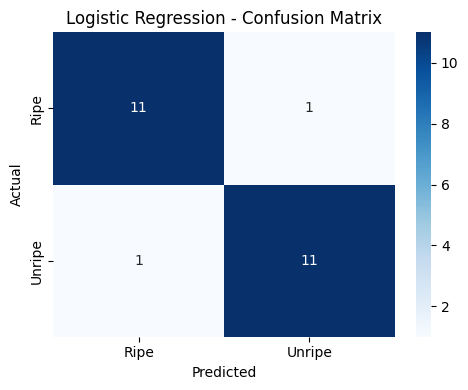


🔍 Model: Random Forest
✅ Best Params: {'model__max_depth': 10, 'model__n_estimators': 50}
📊 Cross-Validation Mean Accuracy: 0.8853
📉 Cross-Validation Std Accuracy: 0.0616

📑 Classification Report:
              precision    recall  f1-score   support

        Ripe       0.90      0.75      0.82        12
      Unripe       0.79      0.92      0.85        12

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24



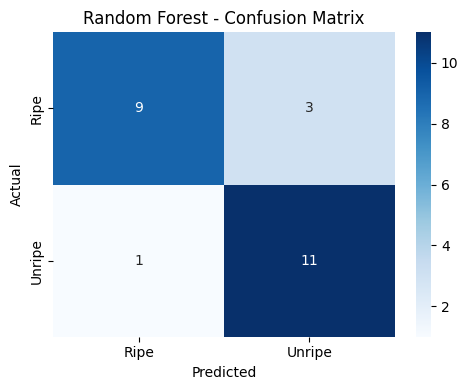


🔍 Model: SVM
✅ Best Params: {'model__C': 10, 'model__kernel': 'rbf'}
📊 Cross-Validation Mean Accuracy: 0.9263
📉 Cross-Validation Std Accuracy: 0.0788

📑 Classification Report:
              precision    recall  f1-score   support

        Ripe       0.92      0.92      0.92        12
      Unripe       0.92      0.92      0.92        12

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



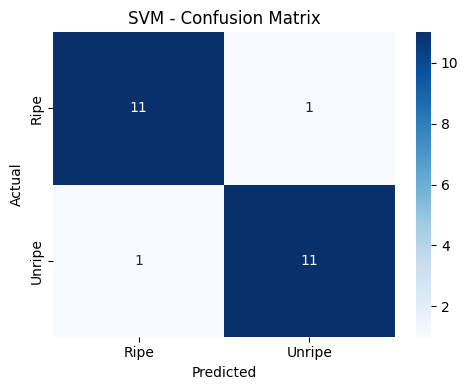

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('significant_features_dataset.csv')

# Encode 'Label' column
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])  # Ripe → 1, Unripe → 0

# Split into features and labels
X = df.drop('Label', axis=1)
y = df['Label']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Define models and hyperparameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'model__C': [0.1, 1, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [50, 100, 150],
            'model__max_depth': [None, 10, 20]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf']
        }
    }
}

# For each model, perform grid search and print results
for name, mp in models.items():
    print(f"\n🔍 Model: {name}")
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', mp['model'])
    ])
    
    grid = GridSearchCV(
        pipeline,
        mp['params'],
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='accuracy',
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    print(f"✅ Best Params: {grid.best_params_}")
    print(f"📊 Cross-Validation Mean Accuracy: {grid.cv_results_['mean_test_score'][grid.best_index_]:.4f}")
    print(f"📉 Cross-Validation Std Accuracy: {grid.cv_results_['std_test_score'][grid.best_index_]:.4f}")
    
    # Classification Report
    print("\n📑 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
